In [202]:
# Fuzzy Car Control
# This is an implementation of a speed control and car seperation using fuzzy logic
# It is based on a solution to the "tipping problem" using fuzzy logic, avaliable at:
# https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
speed_deviation = ctrl.Antecedent(np.arange(-20, 21, 1), 'Speed Deviation')
distance_from_car = ctrl.Antecedent(np.arange(0, 20, 1), 'Distance from car')
throttle= ctrl.Consequent(np.arange(-100, 100, 1), 'throttle')


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
speed_deviation['slow'] = fuzz.trimf(speed_deviation.universe, [-20, -10, 0])
speed_deviation['good'] = fuzz.trimf(speed_deviation.universe, [-2, 0, 2])
speed_deviation['fast'] = fuzz.trimf(speed_deviation.universe, [0, 10, 20])

distance_from_car['very close'] = fuzz.trimf(distance_from_car.universe, [0, 2, 3])
distance_from_car['close'] = fuzz.trimf(distance_from_car.universe, [3, 5, 7])
distance_from_car['okay'] = fuzz.trimf(distance_from_car.universe, [6, 10, 1000])

throttle['low'] = fuzz.trimf(throttle.universe, [-100, -50, 0])
throttle['medium'] = fuzz.trimf(throttle.universe, [-50, 0, 50])
throttle['high'] = fuzz.trimf(throttle.universe, [0, 50, 100])

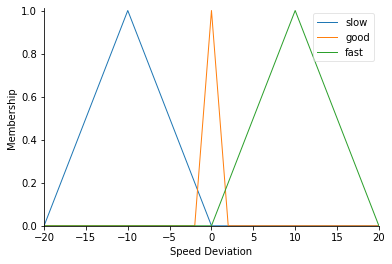

In [203]:
# You can see how these look with .view()
speed_deviation.view()

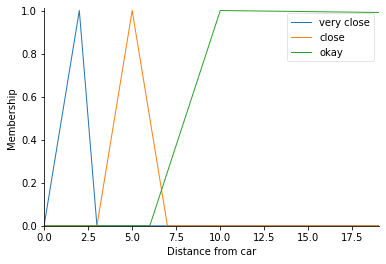

In [204]:
distance_from_car.view()

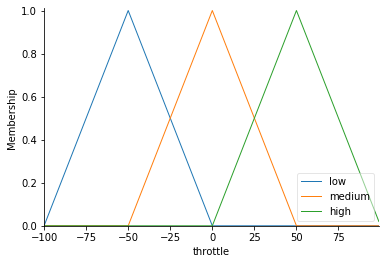

In [205]:
throttle.view()

In [241]:
rule1 = ctrl.Rule(speed_deviation['okay'] | distance_from_car['very close'], throttle['low'])
rule2 = ctrl.Rule(speed_deviation['too slow'] & distance_from_car['good'], throttle['high'])
rule3 = ctrl.Rule(speed_deviation['too slow'] & distance_from_car['poor'], throttle['low'])
rule4 = ctrl.Rule(speed_deviation['okay'] & distance_from_car['good'], throttle['medium'])
rule5 = ctrl.Rule(speed_deviation['okay'] & distance_from_car['average'], throttle['medium'])
rule6 = ctrl.Rule(speed_deviation['okay'] & distance_from_car['poor'], throttle['low'])
rule7 = ctrl.Rule(speed_deviation['too slow'] & distance_from_car['average'], throttle['medium'])
rule8 = ctrl.Rule(speed_deviation['okay'] & distance_from_car['good'], throttle['medium'])
rule9 = ctrl.Rule(speed_deviation['good'] & distance_from_car['average'], throttle['low'])

rule1.view()

ValueError: Membership function 'okay' does not exist for Antecedent Speed Deviation.
Available options: 'slow'; 'good', or 'fast'.

In [213]:
throttle_ctrl = ctrl.ControlSystem([rule1, rule2])

In [214]:
throttling = ctrl.ControlSystemSimulation(throttle_ctrl)


In [239]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
throttling.input['Speed Deviation'] = 10

throttling.input['Distance from car'] = 100

# Crunch the numbers
throttling.compute()

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.

49.99013054378456


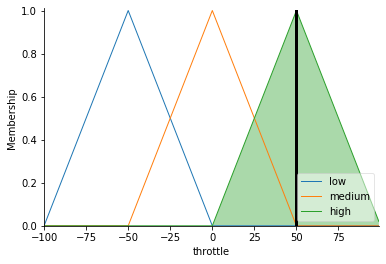

In [238]:
print(throttling.output['throttle'])
throttle.view(sim=throttling)